<a href="https://colab.research.google.com/github/ieshita/Classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Telecust1 - Telecust1.csv to Telecust1 - Telecust1.csv
User uploaded file "Telecust1 - Telecust1.csv" with length 29046 bytes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [5]:
d = pd.read_csv('/content/Telecust1 - Telecust1.csv')

In [6]:
d.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [7]:
d.shape

(1000, 12)

In [8]:
d.isnull().sum()

region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [9]:
d.columns

Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [10]:
#Preprocessing for standardization
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [11]:
dX=d.drop(['custcat'],axis=1)

In [12]:

d['custcat'].value_counts()

C    281
A    266
D    236
B    217
Name: custcat, dtype: int64

In [13]:
y= d['custcat']
y

0      A
1      D
2      C
3      A
4      C
      ..
995    A
996    A
997    D
998    C
999    B
Name: custcat, Length: 1000, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


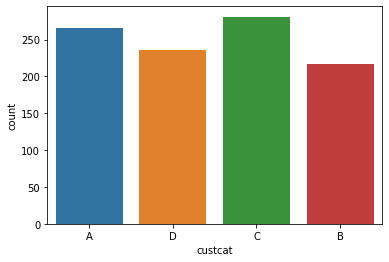

In [14]:
import seaborn
seaborn.countplot(d['custcat'])

In [15]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func= f_classif, k=4)
test.fit(dX,y)
pd.DataFrame(test.scores_)

,0
0,1.094872
1,41.310054
2,7.521435
3,6.689390
4,3.499510
5,8.432945
6,61.454293
7,16.975725
8,3.004734
9,0.373014


In [16]:
X=d[['marital','gender','reside','tenure', 'age', 'address', 'income', 'ed','employ']]

In [17]:

from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=31)

In [18]:

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=31)

In [19]:
pred=knn.predict(X)
pred

array(['A', 'A', 'C', 'B', 'A', 'C', 'B', 'D', 'C', 'C', 'D', 'A', 'A',
       'B', 'A', 'D', 'C', 'A', 'A', 'D', 'A', 'C', 'B', 'C', 'A', 'A',
       'A', 'A', 'A', 'A', 'B', 'C', 'C', 'A', 'B', 'A', 'C', 'C', 'A',
       'C', 'A', 'A', 'A', 'A', 'C', 'B', 'C', 'B', 'A', 'A', 'C', 'B',
       'A', 'A', 'B', 'A', 'B', 'C', 'A', 'B', 'B', 'C', 'A', 'C', 'C',
       'C', 'A', 'B', 'C', 'A', 'A', 'A', 'A', 'B', 'C', 'A', 'D', 'A',
       'C', 'D', 'D', 'A', 'A', 'C', 'C', 'C', 'A', 'B', 'A', 'D', 'A',
       'B', 'B', 'D', 'A', 'A', 'A', 'C', 'C', 'C', 'A', 'D', 'A', 'A',
       'C', 'A', 'A', 'D', 'A', 'B', 'C', 'B', 'A', 'B', 'D', 'A', 'A',
       'B', 'C', 'A', 'C', 'A', 'A', 'A', 'A', 'B', 'C', 'A', 'A', 'C',
       'C', 'A', 'C', 'B', 'B', 'A', 'D', 'A', 'C', 'D', 'A', 'C', 'B',
       'B', 'A', 'D', 'A', 'B', 'C', 'B', 'A', 'B', 'C', 'C', 'D', 'A',
       'D', 'C', 'A', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'B', 'A', 'A',
       'C', 'C', 'A', 'D', 'A', 'D', 'A', 'C', 'B', 'B', 'A', 'C

In [20]:

knn.predict(X).shape

(1000,)

In [21]:
knn.score(X,y)

0.421

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [23]:
accuracy_score(y,pred)

0.421

In [24]:
confusion_matrix(y,pred)

array([[166,  23,  56,  21],
       [ 60,  76,  60,  21],
       [ 95,  43, 121,  22],
       [ 75,  40,  63,  58]])

Text(0.5, 257.44, 'Predicted label')

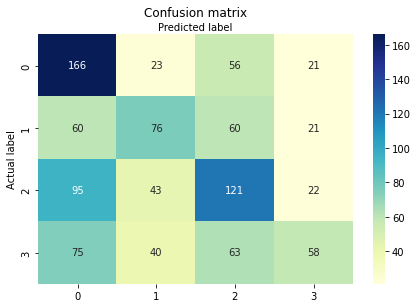

In [25]:
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           A       0.42      0.62      0.50       266
           B       0.42      0.35      0.38       217
           C       0.40      0.43      0.42       281
           D       0.48      0.25      0.32       236

    accuracy                           0.42      1000
   macro avg       0.43      0.41      0.41      1000
weighted avg       0.43      0.42      0.41      1000

